In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-5cdfd860-d458-eb17-bc96-8542499b0431)


In [1]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [2]:
import os
os.getcwd()
os.chdir('gdrive/MyDrive/Projects/DRL/SAC_mdf3/')

In [4]:
!pip install pybullet
!pip install gym
!pip install box2d-py
# !pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 91.7 MB 33 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 448 kB 4.7 MB/s 


In [5]:
!apt-get install x11-utils > /dev/null 2>&1 
!pip install pyglet > /dev/null 2>&1 
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [7]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1


In [9]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

In [10]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

In [12]:
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install -U colabgymrender

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for colabgymrender: filename=colabgymrender-1.1.0-py3-none-any.whl size=3132 sha256=aefe1c0a782d4f64d316850cc76e45dcc90d0d70977b190fa0458589d8cf24d2
  Stored in directory: /root/.cache/pip/wheels/f1/0a/2a/86955ea711b461ab7918236fed2568733f75ed677d0524b56c
Successfully built colabgymrender


In [15]:
!pip install imageio==2.4.1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 6.9 MB/s 
  Created wheel for imageio: filename=imageio-2.4.1-py3-none-any.whl size=3303885 sha256=c37e593cebdf49c17dd05501b282c06c2a11bb1a818842c1b90754646cbae494
  Stored in directory: /root/.cache/pip/wheels/46/20/07/7bb9c8c44e6ec2efa60fd0e6280094f53f65f41767ef69a5ee
Successfully built imageio
  Attempting uninstall: imageio
    Found existing installation: imageio 2.9.0
    Uninstalling imageio-2.9.0:
      Successfully uninstalled imageio-2.9.0


In [12]:
%%time
!python main_sac.py

/content/gdrive/MyDrive/Projects/DRL/SAC_mdf3/sac_torch.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  state = T.Tensor([observation]).to(self.actor.device)
.... saving models ....
episode  0 score -247.3 avg_score -247.3
.... saving models ....
episode  1 score -126.6 avg_score -186.9
.... saving models ....
episode  2 score -524.6 avg_score -299.5
.... saving models ....
episode  3 score -134.2 avg_score -258.2
.... saving models ....
episode  4 score -676.2 avg_score -341.8
.... saving models ....
episode  5 score -57.6 avg_score -294.4
.... saving models ....
episode  6 score -205.0 avg_score -281.6
.... saving models ....
episode  7 score -104.7 avg_score -259.5
.... saving models ....
episode  8 score -125.2 avg_score -244.6
.... saving models ....
episode  9 sco

In [3]:
import torch as T
checkpoint_file_epoch = os.path.join('tmp/sac', 'epoch_sac')
epoch_score = T.load(checkpoint_file_epoch)
epoch = epoch_score['n_epoch']
score_history = epoch_score['score_hist']

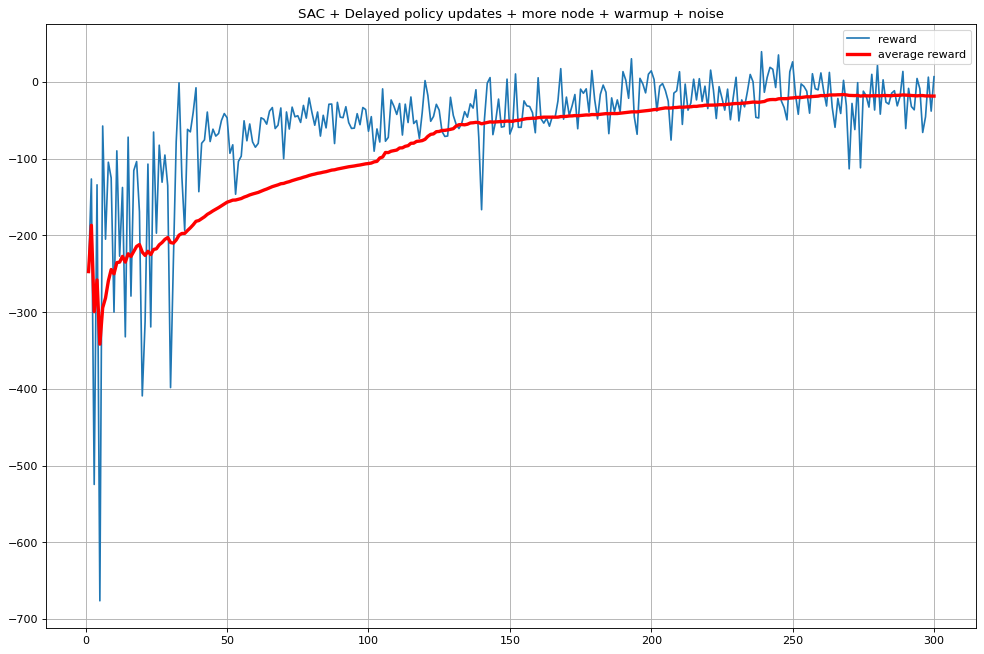

In [10]:
import numpy as np
import matplotlib.pyplot as plt

scores = score_history
running_avg = np.zeros(len(scores))
plt.figure(figsize=(15, 10), dpi=80)

x = [i+1 for i in range(300)]

for i in range(len(running_avg)):
    running_avg[i] = np.mean(scores[max(0, i-100):(i+1)])
plt.plot(x, scores, label = 'reward' )
plt.plot(x, running_avg,'r',linewidth=3.0, label = 'average reward')
plt.title('SAC + Delayed policy updates + more node + warmup + noise')
plt.grid()
plt.legend()
plt.savefig('plots/SAC_mdf3_LunarLanderContinuous-v2.png')
plt.show()

In [7]:
!apt-get install -y \
   libgl1-mesa-dev \
   libgl1-mesa-glx \
   libglew-dev \
   libosmesa6-dev \
   software-properties-common

!apt-get install -y patchelf 

!pip install free-mujoco-py

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgl1-mesa-dev is already the newest version (20.0.8-0ubuntu1~18.04.1).
libgl1-mesa-dev set to manually installed.
software-properties-common is already the newest version (0.96.24.32.18).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
Suggested packages:
  glew-utils
The following NEW packages will be installed:
  libgl1-mesa-glx libglew-dev libglew2.0 libosmesa6 libosmesa6-dev
0 upgraded, 5 newly installed, 0 to remove and 19 not upgraded.
Need to get 2,916 kB of archives.
After this operation, 12.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libgl1-mesa-glx amd64 20.0.8-0ubuntu1~18.04.1 [5,532 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libglew2.0 amd64 2.0.0-5 [140 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/univ

In [ ]:
epoch

199

In [ ]:
score_history.pop()

236.54559068144584

In [ ]:
len(score_history)

199

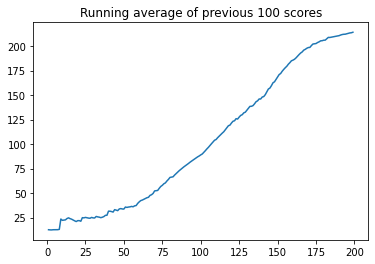

In [ ]:
from utils import plot_learning_curve
x = [i+1 for i in range(199)]

plot_learning_curve(x, score_history, 'inverted_pendulum.png')


In [ ]:
import psutil

threads_count = psutil.cpu_count() / psutil.cpu_count(logical=False)

In [ ]:
threads_count

2.0

In [ ]:
 psutil.cpu_count(logical=False)

1

In [ ]:
!lscpu

In [ ]:
env = gym.make('Phoenix-v0')
env.action_space.shape[0]

Exception: ignored

In [ ]:
import gym
for i in gym.envs.registry.all():
  print(i.id)

Copy-v0
RepeatCopy-v0
ReversedAddition-v0
ReversedAddition3-v0
DuplicatedInput-v0
Reverse-v0
CartPole-v0
CartPole-v1
MountainCar-v0
MountainCarContinuous-v0
Pendulum-v0
Acrobot-v1
LunarLander-v2
LunarLanderContinuous-v2
BipedalWalker-v3
BipedalWalkerHardcore-v3
CarRacing-v0
Blackjack-v0
KellyCoinflip-v0
KellyCoinflipGeneralized-v0
FrozenLake-v0
FrozenLake8x8-v0
CliffWalking-v0
NChain-v0
Roulette-v0
Taxi-v3
GuessingGame-v0
HotterColder-v0
Reacher-v2
Pusher-v2
Thrower-v2
Striker-v2
InvertedPendulum-v2
InvertedDoublePendulum-v2
HalfCheetah-v2
HalfCheetah-v3
Hopper-v2
Hopper-v3
Swimmer-v2
Swimmer-v3
Walker2d-v2
Walker2d-v3
Ant-v2
Ant-v3
Humanoid-v2
Humanoid-v3
HumanoidStandup-v2
FetchSlide-v1
FetchPickAndPlace-v1
FetchReach-v1
FetchPush-v1
HandReach-v0
HandManipulateBlockRotateZ-v0
HandManipulateBlockRotateZTouchSensors-v0
HandManipulateBlockRotateZTouchSensors-v1
HandManipulateBlockRotateParallel-v0
HandManipulateBlockRotateParallelTouchSensors-v0
HandManipulateBlockRotateParallelTouchSen

In [ ]:
import gym


In [ ]:
env = gym.make('LunarLanderContinuous-v2')
env.action_space.shape[0]

AttributeError: ignored

In [ ]:
env.observation_space.shape

NameError: ignored